# MBI, Cvičenie pre informatikov: Úvod do pravdepodobnosti

In [10]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import scipy

## Example 2: Sum of two dice

We roll two standard dice and let random variable $X$ be the sum of their values. What is its distribution?

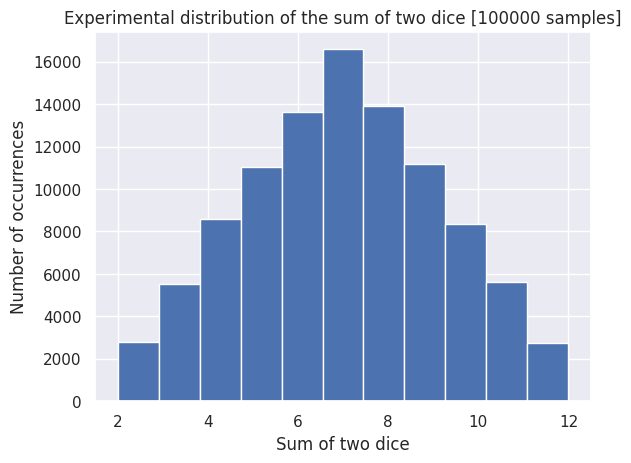

Average of the sum of two dice: 6.99964


In [11]:
def random_two_dice():
  first_die = random.randint(1, 6)
  second_die = random.randint(1, 6)
  return (first_die, second_die)

sample_count = 100_000
samples = [random_two_dice() for _ in range(sample_count)]
totals = [first + second for first, second in samples]

plt.hist(totals, bins=11, density=False)
plt.xlabel("Sum of two dice")
plt.ylabel("Number of occurrences")
plt.title(f"Experimental distribution of the sum of two dice [{sample_count} samples]")
plt.show()

print(f"Average of the sum of two dice: {np.sum(totals)/len(totals)}")

## Example 2: Number of heads on coin tosses

We toss a coin (to your witcher) $N$ times. *What's the probability of getting exactly $k$ heads?*  

In [12]:
N = 3

print(f"All possible combinations of results:\n")
for result in itertools.product("TH", repeat=N):
  print("".join(result))

print(f"\n{N}-configurations by given number of heads:\n")
for i in range(N+1):
  configurations_with_i_heads = filter(
      lambda c: sum(x == "H" for x in c) == i,
      itertools.product("TH", repeat=N))
  pretty_version = ["".join(x) for x in configurations_with_i_heads]
  print(f"{i} heads, {len(pretty_version)} configurations: ", pretty_version)

All possible combinations of results:

TTT
TTH
THT
THH
HTT
HTH
HHT
HHH

3-configurations by given number of heads:

0 heads, 1 configurations:  ['TTT']
1 heads, 3 configurations:  ['TTH', 'THT', 'HTT']
2 heads, 3 configurations:  ['THH', 'HTH', 'HHT']
3 heads, 1 configurations:  ['HHH']


In [13]:
N = 5

print(f"{N}-configurations by given number of heads:\n")
for i in range(N+1):
  configurations_with_i_heads = filter(
      lambda c: sum(x == "H" for x in c) == i,
      itertools.product("TH", repeat=N))
  pretty_version = ["".join(x) for x in configurations_with_i_heads]
  print(f"{i} heads, {len(pretty_version)} configurations: ", pretty_version)

N = 7

print(f"\n{N}-configurations by given number of heads:\n")
for i in range(N+1):
  configurations_with_i_heads = filter(
      lambda c: sum(x == "H" for x in c) == i,
      itertools.product("TH", repeat=N))
  pretty_version = ["".join(x) for x in configurations_with_i_heads]
  print(f"{i} heads, {len(pretty_version)} configurations: ", pretty_version)

5-configurations by given number of heads:

0 heads, 1 configurations:  ['TTTTT']
1 heads, 5 configurations:  ['TTTTH', 'TTTHT', 'TTHTT', 'THTTT', 'HTTTT']
2 heads, 10 configurations:  ['TTTHH', 'TTHTH', 'TTHHT', 'THTTH', 'THTHT', 'THHTT', 'HTTTH', 'HTTHT', 'HTHTT', 'HHTTT']
3 heads, 10 configurations:  ['TTHHH', 'THTHH', 'THHTH', 'THHHT', 'HTTHH', 'HTHTH', 'HTHHT', 'HHTTH', 'HHTHT', 'HHHTT']
4 heads, 5 configurations:  ['THHHH', 'HTHHH', 'HHTHH', 'HHHTH', 'HHHHT']
5 heads, 1 configurations:  ['HHHHH']

7-configurations by given number of heads:

0 heads, 1 configurations:  ['TTTTTTT']
1 heads, 7 configurations:  ['TTTTTTH', 'TTTTTHT', 'TTTTHTT', 'TTTHTTT', 'TTHTTTT', 'THTTTTT', 'HTTTTTT']
2 heads, 21 configurations:  ['TTTTTHH', 'TTTTHTH', 'TTTTHHT', 'TTTHTTH', 'TTTHTHT', 'TTTHHTT', 'TTHTTTH', 'TTHTTHT', 'TTHTHTT', 'TTHHTTT', 'THTTTTH', 'THTTTHT', 'THTTHTT', 'THTHTTT', 'THHTTTT', 'HTTTTTH', 'HTTTTHT', 'HTTTHTT', 'HTTHTTT', 'HTHTTTT', 'HHTTTTT']
3 heads, 35 configurations:  ['TTTTHHH',

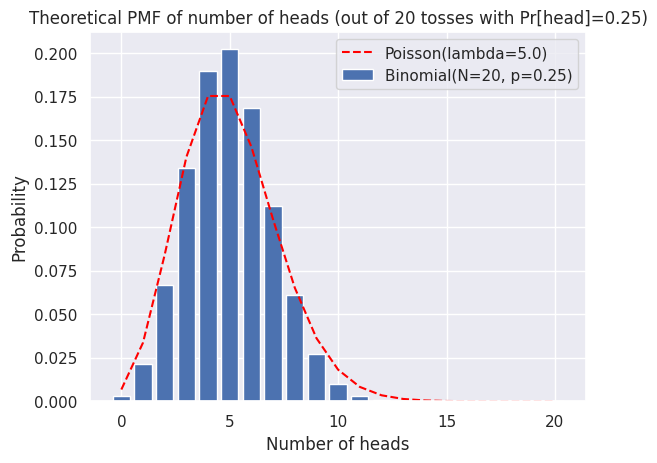

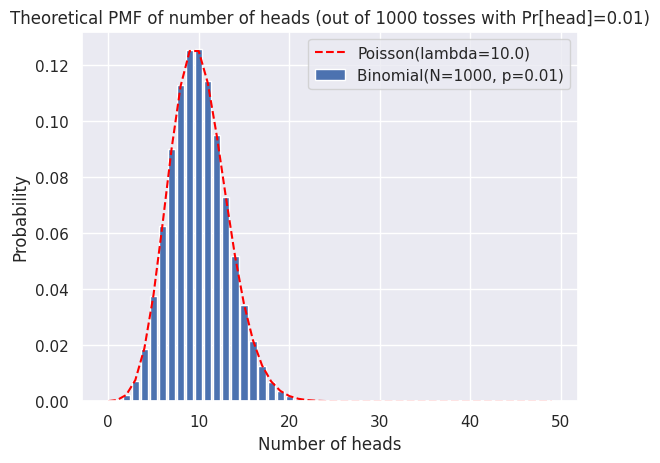

In [14]:
N = 20
p = 1/4

xs = np.arange(N+1)
ys = scipy.stats.binom.pmf(xs, N, p)
y2s = scipy.stats.poisson.pmf(xs, mu=N * p)
y3s = scipy.stats.norm.pdf(xs, loc=N*p, scale=np.sqrt(N*p*(1-p)))
plt.bar(xs, ys, label=f"Binomial({N=}, {p=})")
plt.plot(xs, y2s, label=f"Poisson(lambda={N * p})", color="red", linestyle="dashed")
#plt.plot(xs, y3s, label=f"Normal(mu={N*p}, sigma2={N*p*(1-p)})", color="orange", linestyle="dashed")
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.title(f"Theoretical PMF of number of heads (out of {N} tosses with Pr[head]={p})")
plt.legend()
plt.show()

N = 1000
p = 1/100
xs = np.arange(50)
ys = scipy.stats.binom.pmf(xs, N, p)
y2s = scipy.stats.poisson.pmf(xs, mu=N * p)
y3s = scipy.stats.norm.pdf(xs, loc=N*p, scale=np.sqrt(N*p*(1-p)))
plt.bar(xs, ys, label=f"Binomial({N=}, {p=})")
plt.plot(xs, y2s, label=f"Poisson(lambda={N * p})", color="red", linestyle="dashed")
#plt.plot(xs, y3s, label=f"Normal(mu={N*p}, sigma2={N*p*(1-p)})", color="orange", linestyle="dashed")
plt.xlabel("Number of heads")
plt.ylabel("Probability")
plt.title(f"Theoretical PMF of number of heads (out of {N} tosses with Pr[head]={p})")
plt.legend()
plt.show()


# Example 3: poorly sequenced genome positions



count_coverage_positions([0, 4], 10, 3)=array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0])
count_coverage_positions([0, 4, 9], 10, 3)=array([2, 2, 1, 0, 1, 1, 1, 0, 0, 1])


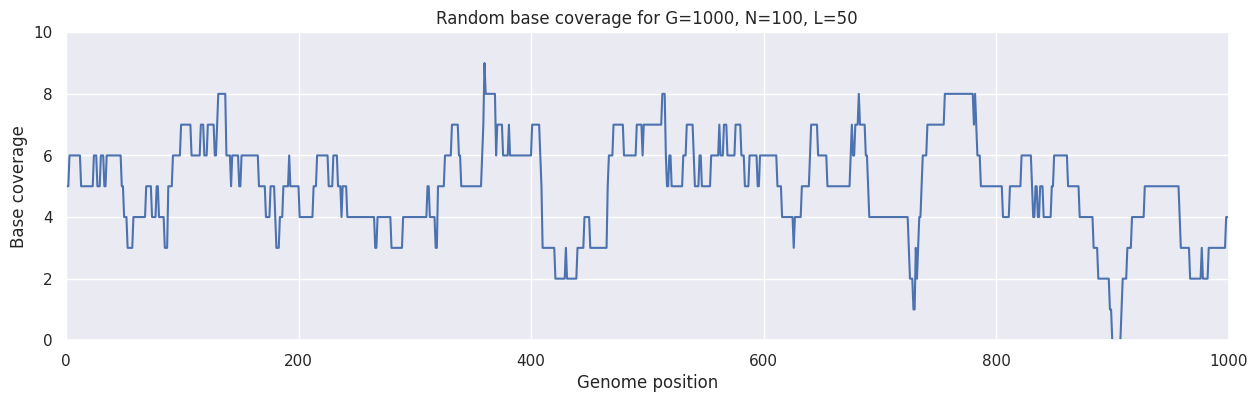

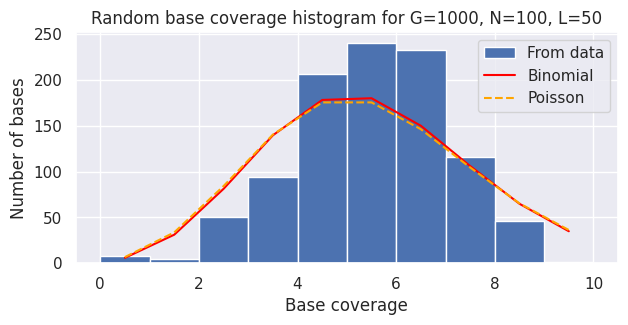

Number of bases with no coverage: 8
Expected number of bases with no coverage (poisson): 6.737946999085467
Number of bases with coverage < 3: 64
Expected number of bases coverage < 3 (poisson): 124.65201948308113


In [15]:
def sample_read_start(g):
  """g - genome length."""
  return random.randint(0, g-1)

def count_coverage_positions(read_starts, g, l):
  """g - genome length, l - read length."""
  diffs = np.zeros(g+1, dtype=int)
  for start in read_starts:
    if start <= g - l:
      diffs[start] += 1
      diffs[start+l] -= 1
    else:
      diffs[start] += 1
      diffs[g] -= 1
      diffs[0] += 1
      diffs[(start + l - g)] -= 1
    coverage = np.cumsum(diffs)[:-1]
  return coverage

# testing
print(f"{count_coverage_positions([0, 4], 10, 3)=}")
print(f"{count_coverage_positions([0, 4, 9], 10, 3)=}")

# testing2
#G, N, L = 100, 2, 50
#G, N, L = 100, 10, 50
G, N, L = 1000, 100, 50
#G, N, L = 10000, 1000, 50

read_starts = [sample_read_start(G) for _ in range(N)]
coverage = count_coverage_positions(read_starts, G, L)

fig, ax = plt.subplots(figsize=(15, 4))
ax.set_xlim(0, G)
ax.set_ylim(bottom=0, top=np.max(coverage)+1)
ax.set_xlabel("Genome position")
ax.set_ylabel("Base coverage")
ax.plot(coverage)
ax.set_title(f"Random base coverage for {G=}, {N=}, {L=}")
plt.show()

fig, ax = plt.subplots(figsize=(7,3))
ax.set_xlabel("Base coverage")
ax.set_ylabel("Number of bases")
ax.hist(coverage, bins=np.arange(0, np.max(coverage)+2), label="From data")
ax.set_title(f"Random base coverage histogram for {G=}, {N=}, {L=}")

# add Binomial for the histogram
xs = np.arange(0, np.max(coverage)+1)
ys = scipy.stats.binom.pmf(xs, N, L/G) * G
ax.plot(xs+0.5, ys, label="Binomial", color="red")

# add Poisson for the histogram
y2s = scipy.stats.poisson.pmf(xs, N * L/G) * G
ax.plot(xs+0.5, y2s, label="Poisson", color="orange", linestyle="dashed")

ax.legend()
plt.show()

print(f"Number of bases with no coverage: {sum(c == 0 for c in coverage)}")
print(f"Expected number of bases with no coverage (poisson): {scipy.stats.poisson.pmf(0, N*L/G) * G}")


print(f"Number of bases with coverage < 3: {sum(c < 3 for c in coverage)}")
print(f"Expected number of bases coverage < 3 (poisson): {np.sum(scipy.stats.poisson.pmf(np.arange(3), N*L/G)) * G}")


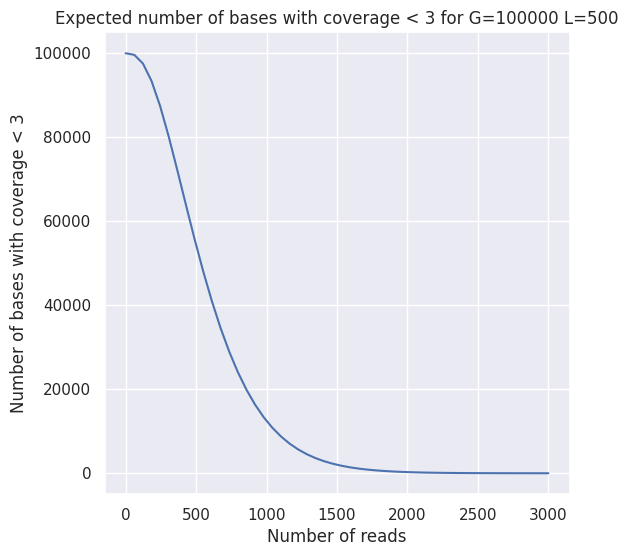

In [19]:
G, L = 100000, 500
Ns = np.linspace(0, 3000, num=50)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel("Number of reads")
ax.set_ylabel("Number of bases with coverage < 3")
ys = [np.sum(scipy.stats.poisson.pmf(np.arange(3), N*L/G)) * G for N in Ns]
ax.plot(Ns, ys, label="Poisson")

ax.set_title(f"Expected number of bases with coverage < 3 for {G=} {L=}")
pass

# Example 4: Number of contigs

In [25]:
def number_of_uncovered_starts(read_starts, g, l, t):
  """g - genome length, l - read length, t - required overlap"""
  sorted_starts = sorted(read_starts)
  number_of_uncovered = 0
  for i, start in enumerate(sorted_starts):
    is_covered = False
    if i > 0 and sorted_starts[i-1] > start - (l - t):
      is_covered = True
    if start < l and len(sorted_starts) > 1: # possible overlap from the end of genome
      if sorted_starts[-1] > g-l and (sorted_starts[-1]+l) % g >= (start+t):
        is_covered = True
    number_of_uncovered += (not is_covered)
  return number_of_uncovered

# testing
#print(f"{number_of_uncovered_starts([0], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 1], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 2], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 3], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 7], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 8], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 9], 10, 3, 1)=}")
#print(f"{number_of_uncovered_starts([0, 0, 0, 0, 0, 0], 10, 3, 1)=}")

# testing2
#G, N, L, T = 100, 2, 50, 10
#G, N, L, T = 100000, 100, 500, 10
#G, N, L, T = 1000, 10000, 50, 10
#G, N, L, T = 1000000, 10000, 1000, 0  # very slow
G, N, L, T = 100000, 10000, 100, 0


experiments = 20
print(f"\n{G=} {N=} {L=} {T=} expected coverage={N*L/G}")
for i in range(experiments):
  read_starts = [sample_read_start(G) for _ in range(N)]
  coverage = count_coverage_positions(read_starts, G, L)
  number_of_uncovered_bases = int(sum(c == 0 for c in coverage))
  uncovered_reads = number_of_uncovered_starts(read_starts, G, L, T)
  print(f"{number_of_uncovered_bases=} {uncovered_reads=}")


G=100000 N=10000 L=100 T=0 expected coverage=10.0
number_of_uncovered_bases=45 uncovered_reads=2
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=30 uncovered_reads=1
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=38 uncovered_reads=2
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=0 uncovered_reads=0
number_of_uncovered_bases=7 uncovered_reads=1
number_of_uncovered_bases=0 uncovered_reads=1
number_of_uncovered_bases=2 uncovered_reads=1
number_of_uncovered_bases=19 uncovered_reads=2
number_of_uncovered_bases=0 uncovered_reads=0


/tmp/ipykernel_1961872/1840461311.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


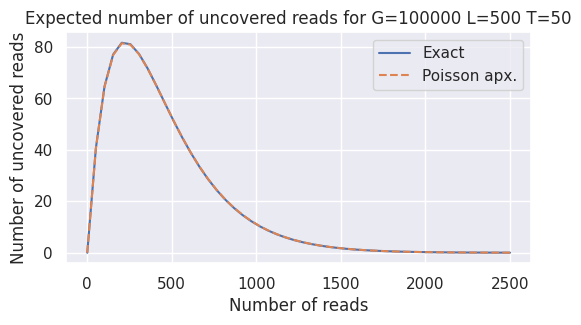

In [18]:
fig, ax = plt.subplots(figsize=(6, 3))

G, L, T = 100000, 500, 50
Ns = np.linspace(0, 2500, num=50)
ax.set_xlabel("Number of reads")
ax.set_ylabel("Number of uncovered reads")
ys = [N * (1 - (L - T)/G)**(N-1)  for N in Ns]
y2s = [N * scipy.stats.poisson.pmf(0, N * (L - T)/G) for N in Ns]
ax.plot(Ns, ys, label="Exact")
ax.plot(Ns, y2s, linestyle="dashed", label="Poisson apx.")

ax.set_title(f"Expected number of uncovered reads for {G=} {L=} {T=}")
ax.legend()
fig.show()